# Problem 2 (Neumann Boundary Conditions)

## Problem Statement

For a square plate of edge length l = 1 metre, simulate the steady state temperature contours for the following boundary values:

1. Temperature at three edges is held constant (100 degree Celsius at the top edge, 50 degree celsius at the bottom edge, and 0 degree celsius at the right edge)
2. The left edge is perfectly insulating, i.e., there is no heat flux. (This is to say that the derivative of the temperature wrt the horizontal direction is 0 at the left edge)

Hint: In each iteration, first calculate the temperatures at the interior grid points as usual. Then update the temperatures at the left edge according to the temperatures at their horizontal right hand side neighbours.

## Solution:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

In [2]:
maxIter = 1000

dX = 0.1
dY = 0.1
lenX = 1 + dX
lenY = 1 + dY

Ttop = 100
Tbottom = 50
Tright = 0

Tguess = 0

In [3]:
colorInterpolation = 100
colorMap = plt.cm.jet

X, Y = np.meshgrid(np.arange(0, lenX, dX), np.arange(0, lenY, dY))

In [4]:
T = np.empty((int(lenY/dY), int(lenX/dX)))
T.fill(Tguess)

T[int(lenY/dY - 1):, :] = Ttop
T[:1, :] = Tbottom
T[:, int(lenX/dX - 1):] = Tright

In [5]:
print("Iterating!")

for iteration in range(maxIter):
    for j in range(1, int(lenX/dX) - 1):
        for i in range(1, int(lenY/dY) - 1):
            T[i,j] = 0.25 * (T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1])
    for i in range(1, int(lenY/dY) - 1):
        T[i,0] = T[i,1]

print("Iteration finished.")

Iterating!
Iteration finished.


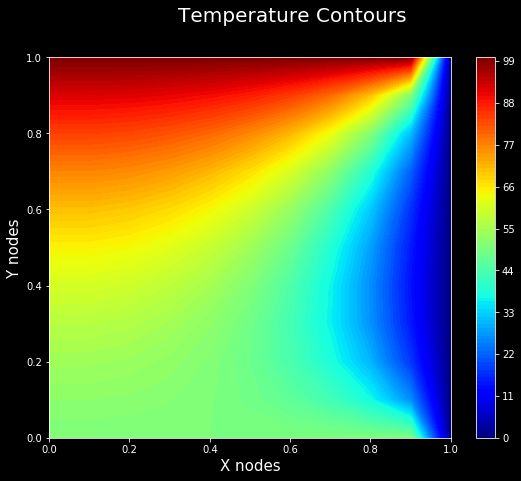

In [7]:
plt.figure(figsize=[9, 7])
plt.style.use('dark_background')
plt.suptitle("Temperature Contours", fontsize=20)
plt.contourf(X, Y, T, colorInterpolation, cmap=colorMap)
plt.xlabel("X nodes", fontsize=15)
plt.ylabel("Y nodes", fontsize=15)
plt.colorbar()